# Análise Exergética de Plantas de Potência a Vapor

por [Afrânio](http://afrjr.weebly.com) - [LMSCP - Laboratório de Modelagem, Simulação e Controle de Processos - PEQ/COPPE/UFRJ](http://www.coppe.ufrj.br/pt-br/pesquisa/laboratorios/laboratorio-de-modelagem-simulacao-e-controle-de-processos-lmscp)

18/12/2017

Este [notebook Jupyter](http://jupyter.org/) introduz o conceito de *exergia* e sua aplicação na análise de processos. A exergia, definida como o trabalho ideal associado à transformação que leva um sistema até o equilíbrio com sua vizinhança, representa uma maneira conveniente de expressar as irreversibilidades de processos e, portanto, de mensurar as limitações de eficiência impostas à engenharia pela natureza. A título de ilustração, são analisados processos de geração de potência a partir do vapor.

Este *notebook* foi elaborado como trabalho final da disciplina COQ836 - Termodinâmica de Processos Irreversíveis, oferecida pelo professor [Fred](mailto:tavares@eq.ufrj.br) no [Programa de Engenharia Química da COPPE-UFRJ](http://portal.peq.coppe.ufrj.br/). A estrutura do texto é baseada nos livros de [Çengel e Boyles (2015)](https://www.amazon.com/Thermodynamics-Engineering-Yunus-Cengel-Dr/dp/0073398179), [Demirel (2014)](https://www.elsevier.com/books/nonequilibrium-thermodynamics/demirel/978-0-444-59557-7) e [Tassios (1993)](http://www.springer.com/br/book/9783662016473). Os códigos estão escritos na linguagem [Python 3.6](https://www.python.org/) e utilizam as bibliotecas [Sympy](http://www.sympy.org/), [NumPy](http://www.numpy.org/), [Matplotlib](https://matplotlib.org/) e [IAWPS](https://pypi.python.org/pypi/iapws).


<img src="https://www.rockwellautomation.com/resources/images/rockwellautomation/publication/Power_Plant_shutterstock_92452177--photograph_848w477h.jpg" width="600"/>

In [1]:
# importando os módulos necessários

import sympy
import numpy as np
from iapws import IAPWS97
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Revisão de conceitos importantes

### 1.1 - Primeira e Segunda Leis da Termodinâmica

* *“Todos os animais são iguais, mas alguns animais são mais iguais que outros”*.

A frase acima está presente no clássico da literatura [A Revolução dos Bichos](https://www.amazon.com/Animal-farm-Fairy-George-Orwell/dp/0451526341/ref=sr_1_1?ie=UTF8&qid=1513534808&sr=8-1&keywords=animal+farm), de George Orwell. Nessa fábula, lançada em 1945, o autor faz uma sátira às revoluções socialistas que resultaram em regimes totalitários, em especial à Revolução Russa. Ao longo do enredo, a revolução dos animais na fazenda contra o sistema opressor dos humanos se transforma aos poucos e sutilmente em um novo sistema de opressão de uma classe particular dos animais (no caso, os porcos) contra as demais classes. A célebre citação representa a culminância da degradação dos ideais igualitários da revolução. O sentido da própria palavra "igual" é corrompido: deixa de denotar algo absoluto, aplicável a todos de maneira equivalente, para se tornar um conceito relativo e passível de gradação.

<img src="http://www.scarrablog.com.au/resources/uploads/2017/09/AF1.jpg" width="600"/>

Ok. Tudo muito interessante, mas o tema deste *notebook* não é literatura. O que isso tem a ver com a termodinâmica, afinal? No livro [Availability (Exergy) Analysis](https://www.amazon.com/Availability-Exergy-Analysis-Instruction-Manual/dp/B0006YV9FA/ref=sr_1_sc_1?ie=UTF8&qid=1513534724&sr=8-1-spell&keywords=availabilty+analysis+sussman), M. V. Sussman apresenta a seguinte frase: 

* *“Todos os joules são iguais, mas alguns joules são mais iguais que outros”*.

Que paródia interessante! Ela sintetiza de forma perspicaz o sentido das duas leis, e, portanto, de toda a teia lógica da termodinâmica: *todos os joules são iguais* (1&ordf; lei!), mas *alguns joules são mais iguais que outros* (2&ordf; lei!).

#### 1.1.1 - A primeira lei e seu aspecto democrático: todos os joules são iguais

Antes de prosseguir a leitura, responda rápido: *o que é energia?*

É bem possível que você tenha engasgado na resposta, por mais que esse conceito seja onipresente tanto no corpo geral de conhecimentos científicos quanto no senso comum. Ouve-se falar de energia por toda parte, mas raramente depara-se com questionamentos sobre *o que ela é*. 

Para refletir mais a fundo sobre essa questão, é útil pensar nas várias formas que a energia assume:

* energia mecânica;
* energia térmica;
* energia elétrica;
* energia nuclear; 
* energia química;
* etc...

Do ponto de vista puramente sensorial, todos esses entes físicos são bem diferentes. Nossa principal forma de contato com o mundo são os nossos sentidos, e, de acordo com eles, não há nenhuma semelhança entre o que sentimos quando interagimos com a energia elétrica ou com a energia térmica, por exemplo. A equivalência entre esses entes, portanto, não é nada óbvia. Apesar disso, os agrupamos sob o manto de um mesmo conceito unificador, o conceito de energia.

Quando se afirma que tais entes físicos são na verdade diferentes particularizações de um mesmo conceito genérico, no fundo o que se faz é estabelecer uma equivalência lógica entre eles. Mas qual característica comum a todos eles permite estabelecer essa equivalência?

A resposta é: *a possibilidade de interconversão*. A energia elétrica pode ser transformada na energia térmica, que pode ser transformada na energia mecânica, e assim por diante. A primeira lei da termodinâmica afirma que *todos os tipos de energia podem se interconverter, e no curso dessas interconversões, a energia total do universo permanece constante.* Do ponto de vista da primeira lei, portanto, as várias formas de energia são equivalentes e contribuem na mesma proporção para a energia total do universo, cuja magnitude não muda.

Nos cursos de termodinâmica, a forma mais comum da primeira lei é aquela válida para sistemas fechados:

$$ \Delta U = Q + W $$

Nessa equação, o calor $Q$ (transferência de energia térmica) e o trabalho $W$ (transferência das demais formas de energia) são considerados grandezas equivalentes que contribuem da mesma forma para a variação da energia interna de um sistema. 

A primeira lei fornece boas indicações sobre a natureza da energia: é algo que se transforma, tanto em termos de forma quanto em termos de distribuição espacial, mas que se mantém invariante ao longo do tempo. Para uma visão completa, no entanto, é preciso analisar a segunda lei da termodinâmica.

#### 1.1.2 - A segunda lei e seu aspecto discriminatório: alguns joules são mais iguais do que outros!

Enquanto a primeira lei estabelece uma equivalência entre os vários tipos de energia, a segunda lei da termodinâmica vai no sentido contrário e introduz uma *intrínseca distinção*. Existem vários enunciados da segunda lei, sendo o elaborado por Kelvin o mais útil para a presente discussão: *nenhum processo pode ter como único efeito a conversão completa de calor em trabalho*. Como *calor* é sinônimo de transferência de energia térmica, o que esse enunciado quer dizer é que a energia térmica essencialmente difere de todas as outras. Enquanto as demais formas de energia são totalmente interconvertíveis, é impossível transformar 100% de uma certa quantidade de energia térmica em qualquer outra forma de energia. Por exemplo, enquanto, a princípio, 1J de energia mecânica pode ser convertido em 1J de energia elétrica, é impossível transformar 1J de energia térmica em 1J de energia elétrica, por mais eficiente que seja o processo. Quando muito, 1J de energia térmica forneceria por volta de 0,5J de energia elétrica.

Uma consequência prática da segunda lei, de enorme importância para a engenharia, é a *intrínseca menor utilidade atribuída à energia térmica em relação às demais formas de energia* (quando se entende *utilidade* como o uso potencial dessa energia para gerar transformações). Além do mais, veremos mais à frente que a própria energia térmica apresenta vários graus de utilidade, a depender das condições em que se encontra.

Chama-se *degradação da energia* o processo contínuo e inexorável da diminuição da utilidade da energia. Enquanto a primeira lei afirma que a *quantidade* total de energia no universo é fixa, a segunda lei diz que a *qualidade* da energia diminui constantemente.

Processos que ocorrem sem degradação de energia são chamados de *processos reversíveis*. Tais processos não ocorrem na realidade, constituindo apenas idealizações que representam o limite máximo de eficiência permitido pela segunda lei da termodinâmica. Quanto mais perto nossos processos se encontram da reversibilidade, melhores engenheiros nós somos. 

Algumas características dos processos reversíveis:

* nunca estão mais do que infinitesimalmente afastados do estado de equilíbrio. Obviamente, um *processo* não pode estar em equilíbrio (já que, na presente discussão, equilíbrio é entendido como ausência de mudanças ao longo do tempo). No entanto, o tipo de processo que mais se aproxima do equilíbrio é o reversível;

* ocorrem como *uma sucessão de estados de equilíbrio*. Dessa maneira, eles podem ser revertidos em qualquer ponto por uma variação infinitesimal das condições externas, já que nunca estão mais do que infinitesimalmente afastados do estado de equilíbrio;

* ao serem revertidos, nenhum traço dessa operação é deixada nas vizinhanças;

* ocorrem sem forças dissipativas (i.e, atrito) ou qualquer outro fator que cause degradação de energia.

Quanto maior a irreversibilidade de um processo, mais ineficiente ele é do ponto de vista da utilização da energia.

#### 1.1.3 - Nota sobre aspectos ontológicos do conceito de energia

Já aprendemos bastante sobre a energia, mas ainda não entendemos realmente *o que ela é*. Algo parece estar faltando em toda essa discussão. E, de fato, muita coisa está faltando. Nos dias de hoje, ainda não é possível avançar nessa questão de um ponto de vista puramente científico. 

[Ontologia](https://pt.wikipedia.org/wiki/Ontologia) é a área da filosofia que trata da natureza da realidade e da existência. Portanto, perguntar *o que é a energia* hoje é formular uma pergunta essencialmente ontológica, que se adequa mais ao campo da metafísica (ramo da filosofia) do que da física (ramo da ciência). Se pensarmos bem, levando em conta todo o corpo de conhecimentos científicos gerados pela humanidade até hoje, a pergunta "o que é energia" realmente não tem muita importância. É raro encontrá-la discutida em periódicos científicos, livros-textos, aulas, etc...

Um dos principais objetivos da ciência é *descrever a realidade por meio de modelos*. Sabendo disso, fica fácil entender a utilidade do conceito de energia, já que *toda transformação da realidade física pode ser modelada por meio de uma transformação de energia*. Por exemplo, quanto mais energia de um determinado tipo possui um corpo, maior a tendência desse corpo de passar para um estado em que possui menos energia desse tipo (perdendo-a para as vizinhanças ou transformando-a internamente em outro tipo). Pode-se dizer então que a *energia é o modelo básico usado pela ciência para descrição da dinâmica da realidade*.

Na filosofia, a discussão metafísica vai mais a fundo. Surge a seguinte pergunta: a energia é apenas uma abstração matemática, uma ferramenta criada para que se descreva a realidade, ou ela é um aspecto intrínseco da realidade, uma *coisa* que realmente existe e está à nossa volta? Em outras palavras: o conceito de energia foi elaborado para construir os modelos ou a energia é um aspecto da realidade descrito pelos modelos? Como toda questão filosófica, muitos já tentaram respondê-la, sem se chegar a um consenso. Aos que se interessam pela discussão, aconselho a consultar referências na área de filosofia da física, como [MC Ginn (2012)](http://www.oxfordscholarship.com/view/10.1093/acprof:oso/9780199841103.001.0001/acprof-9780199841103), em que um dos capítulos se dedica a apresentar argumentos de que a energia é algo que faz parte da realidade concreta e não apenas do mundo das abstrações. 

Como não é possível definir *o que é a energia* de forma clara, é bom tomar cuidado com as várias tentativas de definição que abundam por aí. Muitas delas são simplesmente falsas. Uma das mais populares afirma que "energia é a capacidade de produzir trabalho". 1J de energia térmica, de acordo com essa definição, seria de alguma forma "menos energético" do que 1J de energia elétrica, já que sua capacidade de produzir trabalho é menor.

### 1.2. Máquinas térmicas 

Termo: calor. Dinâmica: movimento. Termodinâmica: estudo do movimento causado pelo calor. O nome da ciência que estudamos, apesar de hoje não fazer jus à sua abrangência e generalidade -- quase universais -- ainda conserva na semântica as origens de sua existência. A humanidade começou a estudar a termodinâmica porque desejava gerar trabalho usando calor.

Qualquer equipamento capaz de cumprir esta tarefa - transformar calor em trabalho - é denominado genericamente de *máquina térmica*.

#### 1.2.1 Funcionamento

A essência de uma máquina térmica é simples. Ela consiste de uma fonte de energia quente (alta $T$); um dispositivo (pistão, turbina, etc.), que transforma calor vindo da fonte quente em trabalho; e uma fonte fria (baixa $T$). Este último item muitas vezes não é claramente identificável: pode ser, por exemplo, o ambiente externo. No entanto, a fonte fria é absolutamente fundamental na estrutura da máquina e sua ausência faz com que ela não funcione. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Second_law_heat_engine.png/350px-Second_law_heat_engine.png" width="200"/>

Máquinas térmicas funcionam em ciclos. Um exemplo seria o de uma planta de potência a vapor, na qual o fluido de trabalho é a água. Para ilustrar, consideremos as etapas do ciclo neste caso:

* água líquida, vinda de um condensador (a fonte fria), é bombeada para o interior de uma caldeira à alta pressão (a fonte quente);

* energia térmica que vem da queima de um combustível é transferida para a água dentro da caldeira, convertendo-a em vapor à temperatura elevada, na pressão da caldeira;

* um dispositivo -- por exemplo, uma turbina -- faz com que o vapor transmita energia para a vizinhança, na forma de trabalho de eixo, reduzindo-se assim sua temperatura e pressão;

* o vapor sai da turbina e é encaminhado ao condensador, onde transfere energia térmica para a vizinhança e se transforma em água líquida, que recomeça o processo.

<img src="http://laplace.us.es/wiki/images/2/25/Esquema-maquina-vapor.png" width="350"/>

#### 1.2.2 Eficiência

Um simples balanço de energia aplicado à agua (*energia que entra = energia que sai*) fornece:

$$ Q_q=W+Q_f $$,

sendo:

* $Q_q$ é a energia que entra, ou seja, o calor vindo da fonte quente;

* $W+Q_f$ é a energia que sai, onde $W$ é o trabalho que o vapor realiza e $Q_f$ é o calor liberado para a fonte fria.

Todos os valores são positivos, devido à própria estrutura da equação de balanço.

Rearranjando, tem-se: 

$$W = Qq - Qf$$.

Define-se a *eficiência* da máquina como sendo a razão entre o trabalho produzido e o calor transferido na fonte quente:

$$ \eta \equiv \frac{W}{Q_q} $$

Substituindo o valor de W, chega-se a:

$$\eta = \frac{Q_q-Q_f}{Q_q}$$

Ou, finalmente:

$$  \eta=1-\frac{Q_f}{Q_q} $$

Essa equação fornece uma informação de suma importância. Para a eficiência da máquina ser total, ou seja, de 100%, $Q_f$ tem de valer zero. Em outras palavras, para a máquina ser perfeita do ponto de vista energético (transformar todo o calor da fonte quente em trabalho), nenhum calor pode ser rejeitado na fonte fria.

O único problema é que, até hoje, nenhuma máquina construída chegou nem ao menos perto deste resultado. Alguma parte do calor vindo da fonte quente *sempre* precisa ser rejeitada na fonte fria; simplesmente *não há exceção a esta regra*!

Isso se dá por conta da segunda lei. A natureza cobra um imposto na transformação de calor em trabalho: parte da energia cedida pela fonte quente precisa ser paga à fonte fria na forma de calor. Isto chega a ser surpreendente, pois a fonte fria, uma das partes mais importantes de uma máquina a vapor, não é nem levada em conta no momento do projeto. No exemplo dado, ela é apenas o ambiente externo.

#### 1.2.3. Máquinas reversíveis

As máquinas que operam da maneira mais eficiente possível são as máquinas reversíveis. Pode-se demonstrar que a eficiência de qualquer máquina reversível é dada por:

$$ \eta= 1 - \frac{T_f}{T_q} $$

Esse é o limite máximo de eficiência que a segunda lei da termodinâmica permite atingir.

### 1.3. Trabalho ideal

Trabalho ideal é o máximo trabalho possível de ser produzido (ou o mínimo trabalho possível de ser gasto) associado a um processo. Esse trabalho é aquele associado a um processo reversível que ocorre entre os mesmos estados inicial e final do processo analisado.

Seja um processo genérico ocorrendo em um sistema aberto (caso mais importante na prática). Nesse caso, o balanço de energia é (desprezando-se os termos de energia cinética e potencial):

$$\Delta H = Q + W$$

Ou seja, o trabalho real é:

$$W = \Delta H - Q$$

O trabalho ideal é aquele associado ao processo reversível:

$$ W_{id} = \Delta H_{rev} - Q_{rev}$$

Como $H$ e $S$ são funções de estado, tem-se:

* $\Delta H = \Delta H_{rev}$
* $Q_{rev} = T^{viz} \Delta S^{viz}_{rev} = - T^{viz} \Delta S$

Daí: 

$$ W_{id} = \Delta H - T^{viz} \Delta S$$

O trabalho perdido $W_{lost} = W - W_{id}$ é expresso como:

$$ W_{lost} = T^{viz} \Delta S^{t} $$

Finalmente, o terreno está preparado para que se possa discutir o tema deste texto: *exergia*!

## 2. Exergia

### 2.1 Definicão

A exergia de um sistema é o *trabalho ideal associado ao processo que leva o sistema até o equilíbrio com a vizinhança*. 

A exergia, portanto, é uma medida prática da capacidade máxima de um sistema de produzir trabalho. Em outras palavras, é uma medida da energia útil contida em um sistema. 

A exergia de um sistema a $T$ e $P$ é dada pela mesma expressão encontrada para o trabalho ideal:

$$ Ex = \Delta H - T^{viz} \Delta S $$

Deve-se ter em mente que o $\Delta$ na equação acima refere-se ao processo que leva o sistema até o equilíbrio com a vizinhança. Na prática, adota-se em geral como condição da vizinhança a condição ambiente $P^{viz} = 1$ atm; $T^{viz} = 298$ K.

A exergia discutida neste *notebook* será apenas a exergia *física*; porém, é perfeitamente possível definir exergias *química* e *de reação* ([DEMIREL, 2013](https://www.amazon.com/Nonequilibrium-Thermodynamics-Transport-Processes-Biological-ebook/dp/B00HLLMYTQ/ref=sr_1_1?ie=UTF8&qid=1513652439&sr=8-1&keywords=demirel+yasar)).

### 2.2 Características da exergia

Algumas características da exergia são:

* A exergia é uma propriedade termodinâmica (função de estado).
* A exergia é uma propriedade do sistema e da vizinhança em conjunto.
* A exergia pode ser entendida como uma medida da distância a que um sistema está do equilíbrio com a vizinhança.
* A exergia sempre é destruída em qualquer processo irreversível.
* O valor da exergia destruída devido a irreversibilidades depende diretamente à produção de entropia e vale $Ex_{lost} = T^{viz} S_{prod}$.
* A exergia de um sistema é completamente destruída se este chega ao equilíbrio com a vizinhança por meio de um processo que não produz trabalho.

A figura abaixo ilustra o valor relativo de várias fontes de energia baseado no conteúdo de exergia.

<img src="https://image.ibb.co/e7Xg76/exergia_comparacao.png" width="200"/>

### 2.3 Exergia da energia térmica

Paradoxalmente, apesar de ser a menos nobre das formas de energia, a energia térmica ainda é a principal fonte de energia da sociedade atual (por conta do grande uso de combustíveis fósseis).

A exergia contida em uma certa quantidade de energia térmica $Q$, transferida na forma de calor e disponível a uma temperatura $T$, é calculada por meio da equação da eficiência da máquina térmica reversível:

$$ Ex = Q\left(1-\frac{T^{viz}}{T}\right) $$

* A quantidade de energia térmica não utilizada, $Q-Ex$, é denominada por alguns autores como *anergia* ([TASSIOS, 1993](http://www.springer.com/br/book/9783662016473)).
* A exergia de qualquer outra forma de energia que não a térmica é igual ao próprio valor da energia.

É instrutivo visualizar o conteúdo de exergia e anergia de 1J energia térmica em função da temperatura:

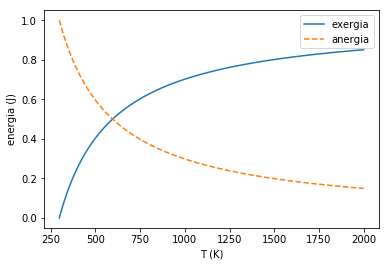

In [2]:
T = np.linspace(298.15,2000.,1000)

Ex = 1.0 - 298.15/T
An = 1.0 - Ex

plt.plot(T, Ex, label='exergia')
plt.plot(T, An,'--', label='anergia')
plt.xlabel('T (K)')
plt.ylabel('energia (J)')
plt.legend();

É notável a diferença entre os conteúdos de exergia a diferentes temperaturas! Por isso que, em plantas de processo, vapor a alta $T$ é bem valioso: devido ao seu alto teor de exergia. Muito trabalho pode ser obtido a partir de calor a 1000 K, por exemplo!

### 2.4 Eficiências de primeiro e segundo tipo

Há duas formas de se calcular a eficiência termodinâmica de um processo, a depender de qual lei da termodinâmica serve como base para o cálculo.

A eficiência de primeiro tipo, baseada na primeira lei da termodinâmica, é definida como:

$$ \eta^{I} = \displaystyle\frac{\displaystyle\sum_i E_i}{\displaystyle\sum_m E_m} $$

$E$ é a energia, $\sum_i$, o somatório das correntes úteis e $\sum_m$, o somatório de todas as correntes. A eficiência de primeiro tipo foi a utilizada anteriormente neste *notebook* para os cálculos de eficiência de máquina térmica. Ela leva em conta apenas as quantidades (e não as qualidades) de energia gasta e obtida na operação. Portanto, tem como base a primeira lei da termodinâmica.

A segunda lei da termodinâmica, entretanto, indica que é impossível atingir a eficiência de 100%. O limite máximo fica bem abaixo. Por que não definir uma nova eficiência, cujo limite máximo seja aquele imposto pela segunda lei? É exatamente isso o que faz a eficiência de segundo tipo, baseada na segunda lei, dada por:

$$ \eta^{II} = \displaystyle\frac{\displaystyle\sum_i Ex_i}{\displaystyle\sum_m Ex_m}$$

$Ex$ é a exergia, $\sum_i$, o somatório das correntes úteis e $\sum_m$, o somatório de todas as correntes. 

É importante entender as diferenças entre os significados dessas eficiências: enquanto $\eta^{I}$ mede o quanto é obtido em relação ao quanto foi gasto para essa obtenção, $\eta^{II}$ mede o quanto foi obtido em relação ao máximo possível de ser obtido.

## 3. Plantas de potência a vapor

A maior parte da produção de eletricidade no mundo se dá em plantas de potência a vapor. Tais plantas são no fundo grandes máquinas térmicas em que o fluido de trabalho, a água, passa por mudanças de estado líquido-vapor ao longo do ciclo.

O modelo que serve como base para o entendimento do funcionamento das plantas a vapor é o *ciclo de Rankine*, apresentado na figura abaixo.

<img src="https://image.ibb.co/gTycfR/ideal_pure.png" width="320"/>

Lembre-se de que, para qualquer substância pura, a determinação de duas de suas propriedades especifica completamente seu estado termodinâmico. Portanto, a marcação da temperatura $T$ e da entropia $s$ no diagrama acima especifica em que estado se encontra a água.

A curva vermelha, em formato de U, representa o envelope de saturação. Um estado exatamente sobre o envelope corresponde à saturação: do lado esquerdo está o líquido saturado, e, do lado direito, vapor saturado. Dentro do envelope se encontram os estados de equilíbrio líquido-vapor: quanto mais perto do lado esquerdo, maior a quantidade de líquido; quanto mais perto do lado direito, maior a quantidade de vapor. No jargão da área, a proporção de vapor no sistema bifásico é denominada *qualidade*.

### 3.1 Caso 1 - Ciclo de Rankine propriamente dito

#### 3.1.1 - Ciclo de Rankine ideal - caso base

O ciclo de Rankine ideal é o próprio ciclo que está representado na figura do começo desta Seção. Nesse caso, a operação se dá sem nenhuma irreversibilidade interna. A única fonte de irreversibilidades é a troca de temperaturas a uma diferença finita no evaporador e no condensador (etapas 2->3 e 4->1). As operações de compressão (1->2) e expansão (3->4) são consideradas reversíveis e, portanto, isentrópicas; como não geram entropia, também não destroem exergia.

No exemplo específico aqui analisado, as condições conhecidas são:

* $P_1 = 75$ kPa (pressão do condensador);
* $P_3 = 3$ MPa e $T_3 = 350^{\circ}$C (pressão e temperatura final do evaporador);
* $ T_0 = 300$ e $T_q = 800 $ K (temperaturas ambiente e da fonte quente).

Para começar a análise, é preciso calcular as propriedades de vapor. Isso é feito utilizando o módulo [IAWPS](https://pypi.python.org/pypi/iapws).

Cada corrente do processo é definido como uma instância da classe IAPWS97, importada do módulo [IAWPS](https://pypi.python.org/pypi/iapws). Ao construtor da instância, devem ser fornecidas duas propriedades para que a condição da corrente seja completamente especificada. 

Abaixo, uma função chamada **print_properties** é definida para tornar mais fácil a impressão das propriedades de cada corrente na tela. A função deve aceitar o objeto correspondente à corrente e um número que a identifica no ciclo.

In [3]:
def print_properties(corr, id):
    
    print('----------')
    print('CORRENTE '+str(id))
    print('----------')
    
    print('T:', corr.T,'K')
    print('P:', corr.P,'MPa')
    print('v:', corr.v,'m^3/kg')
    print('h:', corr.h,'kJ/kg')
    print('s:', corr.s,'kJ/kg K')

Para definir a corrente 1 (saída do condensador e alimentação da bomba), especifica-se sua pressão (fornecida) e qualidade (nula, correspondente à condição de líquido saturado). A corrente 2 (saída da bomba e alimentação do refervedor) é definida pela pressão (igual à da corrente 3, já que a operação no refervedor é isobárica) e pela entropia (igual à da corrente 1, já que a operação no compressor é isentrópica). A condição da corrente 3 (saída do refervedor e alimentação da turbina) é completamente especificada pelas informações fornecidas. A corrente 4 (saída da turbina e alimentação do condensador) é determinada utilizando-se a entropia (lembrar que a expansão na turbina é isentrópica, como na bomba).

A seguir, esses passos são implementados:

In [4]:
##############
# CORRENTE 1
##############

# propriedades da corrente 1
P1 = 0.075
x1 = 0.

# definindo corrente 1
cor1 = IAPWS97(P=P1, x = x1)

# imprimindo propriedades da corrente 1
print_properties(cor1,1)

##############
# CORRENTE 2
##############

# propriedades da corrente 2
P2 = 3.
s2 = cor1.s

# definindo corrente 2
cor2 = IAPWS97(P=P2, s = s2)

# imprimindo propriedades da corrente 2
print_properties(cor2,2)

##############
# CORRENTE 3
##############

# propriedades da corrente 3
P3 = 3.
T3 = 350+273.15

# definindo corrente 3
cor3 = IAPWS97(P=P3, T = T3)

# imprimindo propriedades da corrente 3
print_properties(cor3,3)

##############
# CORRENTE 4
##############

# propriedades da corrente 4
P4 = P1
s4 = cor3.s

# definindo corrente 4
cor4 = IAPWS97(P=P4, s = s4)

# imprimindo propriedades da corrente 4
print_properties(cor4,4)

----------
CORRENTE 1
----------
T: 364.90779128713774 K
P: 0.075 MPa
v: 0.0010372190358311562 m^3/kg
h: 384.36547579253715 kJ/kg
s: 1.2129634483689353 kJ/kg K
----------
CORRENTE 2
----------
T: 365.0933635759776 K
P: 3.0 MPa
v: 0.0010359183018938609 m^3/kg
h: 387.3974360614888 kJ/kg
s: 1.2129634483689329 kJ/kg K
----------
CORRENTE 3
----------
T: 623.15 K
P: 3.0 MPa
v: 0.09055500685170695 m^3/kg
h: 3116.0621790826153 kJ/kg
s: 6.744920373754706 kJ/kg K
----------
CORRENTE 4
----------
T: 364.90779128713774 K
P: 0.075 MPa
v: 1.9647802413444628 m^3/kg
h: 2403.029761870146 kJ/kg
s: 6.744920373754706 kJ/kg K


É interessante notar que o cálculo de propriedades do vapor, geralmente uma fonte de desalento para alunos de graduação devido às inúmeras interpolações e consultas a extensas tabelas, se torna bastante facilitada. Entretanto, apesar da facilidade, o programador ainda tem pleno controle e entendimento do fluxo do cálculo.

Abaixo é definida uma função para traçado do diagrama TS do ciclo.

In [5]:
def diagrama_TS_rankine (T_range, P_points, cor_array, ax):
    
    cor1       = cor_array[0]
    cor2_ideal = cor_array[1]
    cor2       = cor_array[2]
    cor3       = cor_array[3]
    cor4_ideal = cor_array[4]
    cor4       = cor_array[5]
    
    # plotando isobáricas determinadas
    for P in P_points:
        steam = [IAPWS97(T=t, P=P) for t in T_range]
        S = [s.s for s in steam]
        ax.plot(S, T_range, 'k-')
        
    # plotando o envelope de saturação
    svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T_range]]
    sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T_range]]
    ax.plot(svap, T_range, 'k-')
    ax.plot(sliq, T_range, 'k-')
    
    # calculando as isobáricas do processo
    
    T23 = np.linspace(cor2.T, cor3.T)
    S23 = [s.s for s in [IAPWS97(P=cor2.P, T=t) for t in T23]]
    
    S41 = np.linspace(cor4.s,cor1.s)
    T41 = [t.T for t in [IAPWS97(P=P1, s=S) for S in S41]]
    
    # plotando o processo!
        
    # 1 -> 2 (ideal)
    ax.plot([cor1.s, cor2_ideal.s], [cor1.T, cor2_ideal.T], 'r--', lw=4)
    
    # 1 -> 2 (real)
    ax.plot([cor1.s, cor1.s], [cor1.T, cor2.T], 'r-', lw=4)

    # 2 -> 3
    ax.plot(S23, T23, lw=4) 
    
    # 3 -> 4 (ideal)
    ax.plot([cor3.s, cor4_ideal.s], [cor3.T, cor4_ideal.T], 'g--', lw=4)
    
    # 3 -> 4 (real)
    ax.plot([cor3.s, cor4.s], [cor3.T, cor4.T], 'g-', lw=4)
    
    # 4 -> 1
    ax.plot(S41, T41, lw=4)
    
    ax.set_xlabel('Entropia (kJ/(kg K)')
    ax.set_ylabel('Temperatura (K)')
    ax.set_title('Diagrama TS - Ciclo de Rankine')

A função **diagrama_TS** pode ser usada para plotar o diagrama de qualquer ciclo de Rankine clássico. Na célula abaixo ela é usada usada para plotar o diagrama do exemplo específico:

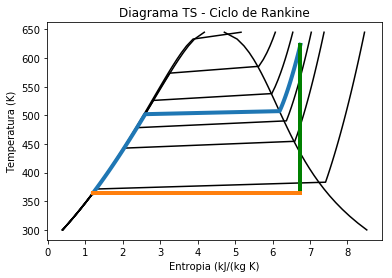

In [6]:
T_range =  np.linspace(300, 372+273, 30)
P_points = [0.1, 1, 2, 5, 10, 20]
cor_array = [cor1, cor2, cor2, cor3, cor4, cor4]

diagrama_TS_rankine (T_range, P_points, cor_array, plt.gca())

Ao contrário de como é geralmente apresentado nos livros-texto, a elevação de temperatura da etapa 1->2 na bomba é imperceptível no diagrama!

Para calcular a eficiência de primeiro tipo, será usada a equação:

$$\eta^{I} = 1 - \frac{Q_c}{Q_h}$$

Para calcular a eficiência do segundo tipo, serão usadas as seguintes expressões para a perda (destruição) de exergia e para a eficiência propriamente dita:

$$Ex_{loss} = T_0 \Delta S^{total} = T_0 \left(\Delta s + \frac{Q_{out}}{T_{out}} - \frac{Q_{in}}{T_{in}}\right)$$

$$\eta^{II} = 1 - \frac{Ex_{loss}}{Ex_{gasto}}$$

Uma classe que contém funções para calcular essas eficiências é definida abaixo:

In [7]:
class analise_eta_rankine (object):
    
    def __init__ (self, T0, Th, cor_array, eta_bomba = 1.0, eta_turb = 1.0):
        
        self.T_0 = T0
        self.T_h = Th
        self.eta_bomba = eta_bomba
        self.eta_turb = eta_turb
        
        self.cor1 = cor_array[0]
        self.cor2 = cor_array[1]
        self.cor3 = cor_array[2]
        self.cor4 = cor_array[3]
                
        # calores envolvidos
        self.q_h =  self.cor3.h - self.cor2.h
        self.q_c = self.cor4.h - self.cor1.h
        
        # trabalhos envolvidos
        self.w_bomba = self.cor1.v*(self.cor2.P-self.cor1.P)*1e3/self.eta_bomba
        self.w_turb  = (self.cor3.h-self.cor4.h)
        
    def calc_Eta1 (self):
                
        self.eta_1st_law = self.w_turb/(self.q_h+self.w_bomba)
        
    def calc_Ex_loss (self):
        
        # bomba
        self.Ex_loss_1_2 = self.w_bomba*(1./self.eta_bomba-1)
    
        # refervedor
        self.Ex_loss_2_3 = self.T_0*(self.cor3.s-self.cor2.s-self.q_h/self.T_h)
        #self.Ex_loss_2_3 = self.cor2.h - self.cor3.h - self.T_0*(self.cor2.s-self.cor3.s) + (1-self.T_0/self.T_h)*self.q_h
        
        # turbina
        self.Ex_loss_3_4 = self.w_turb*(1./self.eta_turb-1.)

        # condensador
        self.Ex_loss_4_1 = self.T_0*(self.cor1.s-self.cor4.s+self.q_c/self.T_0)

        # total
        self.Ex_loss_total = self.Ex_loss_1_2 + self.Ex_loss_2_3 + self.Ex_loss_3_4 + self.Ex_loss_4_1
         
        # fracoes da Ex perdida
        self.frac_Ex_loss_1_2 = self.Ex_loss_2_3/self.Ex_loss_total
        self.frac_Ex_loss_2_3 = self.Ex_loss_2_3/self.Ex_loss_total
        self.frac_Ex_loss_3_4 = self.Ex_loss_2_3/self.Ex_loss_total
        self.frac_Ex_loss_4_1 = self.Ex_loss_4_1/self.Ex_loss_total
        
    def calc_Ex_gasto (self):
        
        # bomba (=trabalho da bomba!)
        self.Ex_gasto_1_2 = self.w_bomba

        # refervedor (= eficiencia de carnot * calor trocado!)
        self.Ex_gasto_2_3 = (1.-self.T_0/self.T_h)*self.q_h

        # total
        self.Ex_gasto_total = self.Ex_gasto_1_2+self.Ex_gasto_2_3
        
    def calc_Eta2 (self):
        
        self.eta_2nd_law = 1.0 - self.Ex_loss_total/self.Ex_gasto_total
        
    def calc_all (self):
        
        self.calc_Eta1()
        self.calc_Ex_loss()
        self.calc_Ex_gasto()
        self.calc_Eta2()
        
    def print_results (self):
        
        print('Calor do refervedor: ',self.q_h,'kJ/kg')
        print('Calor do condensador: ', self.q_c,'kJ/kg')
        print('Trabalho da bomba: ', self.w_bomba,'kJ/kg')
        print('Trabalho da turbina: ', self.w_turb,'kJ/kg')
        print('------------------------------------------------')
        print('Eficiência de primeiro tipo: ',self.eta_1st_law)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Perda de exergia do refervedor: ',self.Ex_loss_2_3,'kJ/kg')
        print('Perda de exergia do condensador:', self.Ex_loss_4_1,'kJ/kg')
        print('Perda de exergia da bomba: ', self.Ex_loss_1_2,'kJ/kg')
        print('Perda de exergia da turbina: ', self.Ex_loss_3_4,'kJ/kg')
        print('------------------------------------------------')
        print('% da perda de exergia no refervedor: ',self.Ex_loss_2_3/self.Ex_loss_total)
        print('% da perda de exergia no condensador: ',self.Ex_loss_4_1/self.Ex_loss_total)
        print('% da perda de exergia na bomba: ',self.Ex_loss_1_2/self.Ex_loss_total)
        print('% da perda de exergia na turbina: ',self.Ex_loss_3_4/self.Ex_loss_total)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Gasto de exergia da bomba: ',self.Ex_gasto_1_2,'kJ/kg')
        print('Gasto de exergia do refervedor:',self.Ex_gasto_2_3,'kJ/kg')
        print('------------------------------------------------')
        print('% do gasto de exergia na bomba: ',self.Ex_gasto_1_2/self.Ex_gasto_total)
        print('% do gasto de exergia no refervedor: ',self.Ex_gasto_2_3/self.Ex_gasto_total)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Eficiência do segundo tipo:',self.eta_2nd_law)

Abaixo, a classe **analise_eta_rankine** é usada para os cálculos referentes ao exemplo específico:

In [8]:
# temperatura ambiente
T_0 = 300

# temperatura da fonte quente
T_h = 800

analise1 = analise_eta_rankine (T_0, T_h, [cor1, cor2, cor3, cor4])
analise1.calc_all()
print('------------------------------------------------')
print('Análise energética e exergética: P1 = 75 kPa, P3 = 3 MPa, T3 = 350 K, T0 = 300 K e Tq = 800 K')
print('------------------------------------------------')
analise1.print_results()

------------------------------------------------
Análise energética e exergética: P1 = 75 kPa, P3 = 3 MPa, T3 = 350 K, T0 = 300 K e Tq = 800 K
------------------------------------------------
Calor do refervedor:  2728.6647430211265 kJ/kg
Calor do condensador:  2018.664286077609 kJ/kg
Trabalho da bomba:  3.033865679806132 kJ/kg
Trabalho da turbina:  713.0324172124692 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.26102162769396947
------------------------------------------------
------------------------------------------------
Perda de exergia do refervedor:  636.3377989828093 kJ/kg
Perda de exergia do condensador: 359.0772084618776 kJ/kg
Perda de exergia da bomba:  0.0 kJ/kg
Perda de exergia da turbina:  0.0 kJ/kg
------------------------------------------------
% da perda de exergia no refervedor:  0.6392688418635976
% da perda de exergia no condensador:  0.3607311581364025
% da perda de exergia na bomba:  0.0
% da perda de exergia na turbina: 

A análise exergética permite concluir que o protagonista do processo, do ponto de vista exergético, é o refervedor! A maior parte da ineficiência do processo e praticamente todo o gasto de exergia é resultante da troca de calor na fonte quente. 

Podemos nos perguntar o que fazer para aumentar a eficiência do ciclo de Rankine ideal. Três opções são:

* diminuir a pressão do condensador;
* superaquecer o vapor a altas temperaturas;
* aumentar a pressão no refervedor.

Todas essas modificações tem como base o aumento e a diminuição das temperatura média com que se troca calor no refervedor e no condensador, respectivamente.

Vejamos o que ocorre com as eficiências em cada uma dessas modificações.

#### 3.1.2 - Ciclo de Rankine ideal - Análise do efeito da variação da pressão do condensador

Nessa análise, a pressão do condensador é variada de 0,01 a 0,075 MPa.

In [9]:
##############
# CORRENTE 1
##############

P1 = np.linspace(0.01,0.075,100)
x1 = 0.
cor1 = []
for p in P1:
    cor1.append(IAPWS97(P=p, x = x1))

##############
# CORRENTE 2
##############

P2 = 3.
cor2 = []
for cor in cor1:
    s2 = cor.s
    cor2.append(IAPWS97(P=P2, s = s2))

##############
# CORRENTE 3
##############

P3 = 3.
T3 = 350. +273.15
cor3 = IAPWS97(P=P3, T = T3)
    
##############
# CORRENTE 4
##############    
    
P4 = P1
s4 = cor3.s
cor4 = []
for p in P4:
    cor4.append(IAPWS97(P=p, s = s4))

Definidas as correntes, pode-se realizar os cálculos:

In [10]:
# temperatura ambiente
T_0 = 300

# temperatura da fonte quente
T_h = 800

analise2 = []

for i in range(len(cor1)):
    analise2.append(analise_eta_rankine(T_0, T_h, [cor1[i], cor2[i], cor3, cor4[i]]))
    analise2[i].calc_all()

A seguir, as eficiências são plotadas.

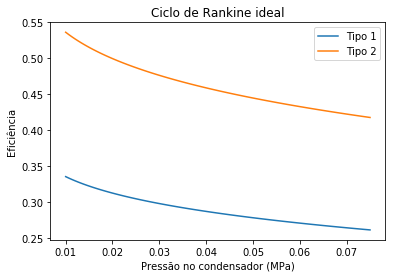

In [11]:
plt.plot(P1, [analise2[i].eta_1st_law for i in range(len(P1))], label='Tipo 1')
plt.plot(P1, [analise2[i].eta_2nd_law for i in range(len(P1))], label='Tipo 2')
plt.title('Ciclo de Rankine ideal')
plt.xlabel('Pressão no condensador (MPa)')
plt.ylabel('Eficiência')
plt.legend();

Nota-se que as eficiências aumentam no mesmo sentido, conforme diminui-se a pressão no condensador.

Uma pergunta válida é: como as frações de perda de exergia variam conforme a pressão no condensador varia?

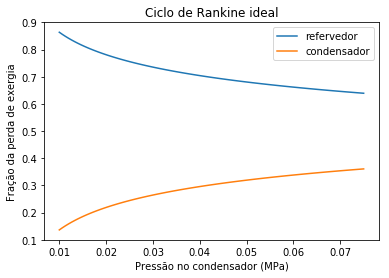

In [12]:
plt.plot(P1,[analise2[i].frac_Ex_loss_2_3 for i in range(len(P1))],label='refervedor')
plt.plot(P1,[analise2[i].frac_Ex_loss_4_1 for i in range(len(P1))],label='condensador')
plt.title('Ciclo de Rankine ideal')
plt.xlabel('Pressão no condensador (MPa)')
plt.ylabel('Fração da perda de exergia')
plt.legend();

Quanto menor a pressão do condensador, menor também a fração da exergia total perdida durante a operação de condensação.

#### 3.1.3 Ciclo de Rankine ideal - Efeito da variação da temperatura de saída do refervedor

Nessa análise, a temperatura do refervedor é variada de 350 a 600 K, enquanto a pressão no condensador é mantida a 0,01 MPa.

In [13]:
##############
# CORRENTE 1
##############

P1 = 0.01
x1 = 0.
cor1 = IAPWS97(P=P1, x = x1)

##############
# CORRENTE 2
##############

P2 = 3.
s2 = cor1.s
cor2 = IAPWS97(P=P2, s = s2)

##############
# CORRENTE 3
##############

P3 = 3.
T3 = np.linspace(350,600,100)+273.15

cor3 = []
for t in T3:
    cor3.append(IAPWS97(P=P3, T = t))
    
##############
# CORRENTE 4
##############    
    
P4 = P1

cor4 = []
for cor in cor3:
    s4 = cor.s
    cor4.append(IAPWS97(P=P4, s = s4))

Efetuando os cálculos:

In [14]:
# temperatura ambiente
T_0 = 300

# temperatura da fonte quente
T_h = 800

analise3 = []
for i in range(len(cor3)):
    analise3.append(analise_eta_rankine(T_0, T_h, [cor1, cor2, cor3[i], cor4[i]]))
    analise3[i].calc_all()

Checando o comportamento das eficiências e destruição de exergia em cada etapa:

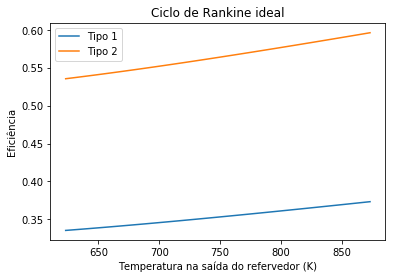

In [15]:
plt.plot(T3,[analise3[i].eta_1st_law for i in range(len(T3))],label='Tipo 1')
plt.plot(T3,[analise3[i].eta_2nd_law for i in range(len(T3))],label='Tipo 2')
plt.title('Ciclo de Rankine ideal')
plt.xlabel('Temperatura na saída do refervedor (K)')
plt.ylabel('Eficiência')
plt.legend();

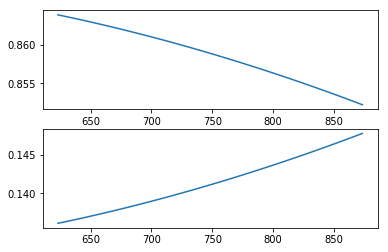

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(T3,[analise3[i].frac_Ex_loss_2_3 for i in range(len(T3))])
ax[1].plot(T3,[analise3[i].frac_Ex_loss_4_1 for i in range(len(T3))]);

Nota-se que o efeito do aumento da temperatura aumenta a eficiência global, mas pouco interfere na distribuição de irreversibilidades entre refervedor e condensador.

#### 3.1.4 Ciclo de Rankine ideal - Efeito da variação da pressão do refervedor

Nessa análise, a pressão do refervedor é variada de 3 MPa a 15 MPa, mantendo-se a pressão no condensador a 0,01 MPa e a temperatura na saída do refervedor a 600$^{\circ}$C.

In [17]:
##############
# CORRENTE 1
##############

P1 = 0.01
x1 = 0.
cor1 = IAPWS97(P=P1, x = x1)

##############
# CORRENTE 2
##############

s2 = cor1.s
P2 = np.linspace(3,15,10)
cor2 = []
for p in P2:
    cor2.append(IAPWS97(P=p, s = s2))

##############
# CORRENTE 3
##############

P3 = P2
T3 =600+273.15
cor3 = []
for p in P3:
    cor3.append(IAPWS97(P=p, T = T3))
    
##############
# CORRENTE 4
##############    
    
P4 = P1
cor4 = []
for cor in cor3:
    s4 = cor.s
    cor4.append(IAPWS97(P=P4, s = s4))

Efetuando os cálculos:

In [18]:
# temperatura ambiente
T_0 = 300

# temperatura da fonte quente
T_h = 800

analise4 = []

for i in range(len(cor2)):
        
    analise4.append(analise_eta_rankine(T_0, T_h, [cor1, cor2[i], cor3[i], cor4[i]]))
    analise4[i].calc_all()

Plotando os resultados:

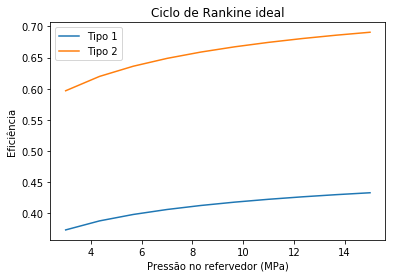

In [19]:
plt.plot(P2,[analise4[i].eta_1st_law for i in range(len(P2))], label='Tipo 1')
plt.plot(P2,[analise4[i].eta_2nd_law for i in range(len(P2))], label='Tipo 2')
plt.title('Ciclo de Rankine ideal')
plt.xlabel('Pressão no refervedor (MPa)')
plt.ylabel('Eficiência')
plt.legend();

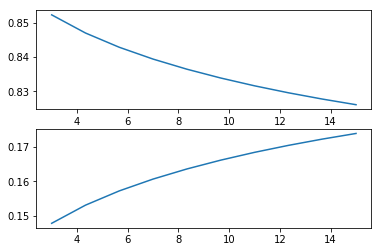

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(P2,[analise4[i].frac_Ex_loss_2_3 for i in range(len(P2))])
ax[1].plot(P2,[analise4[i].frac_Ex_loss_4_1 for i in range(len(P2))]);

O aumento de eficiência é bastante alto, chegando-se a eficiências do segundo tipo próximas a 0,70. À semelhança do exemplo anterior, as distribuições de irreversibilidades entre refervedor e condensador não mudam muito, apesar do aumento de eficiência.

Parece que chegamos ao melhor dos mundos, certo? Basta aumentar $T_3$ e $P_3$ e diminuir $P_1$ cada vez mais, até atingirmos a maior eficiência possível. Problema resolvido.

Bom, na engenharia, as coisas não são assim tão simples. Vários empecilhos de ordem prática impedem que se aumente $T_3$ e $P_3$ e diminua $P_1$ indiscriminadamente em uma planta de processo. Um dos principais problemas está relacionado ao aumento de $P_3$: aumentar a pressão do refervedor leva a uma diminuição da qualidade do vapor que sai da turbina (ou seja, a um aumento de seu teor de líquido). Isso causa diversos contratempos, como erosão das pás da turbina, entre outros. 

Podemos checar essa afirmação por meio de um gráfico da qualidade do vapor na saída da turbina em função da pressão no refervedor:

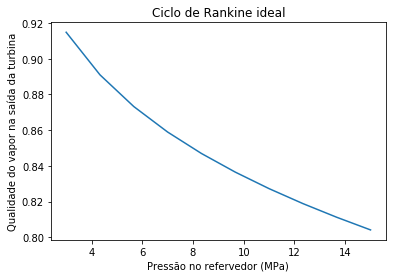

In [21]:
plt.plot(P2,[analise4[i].cor4.x for i in range(len(P2))])
plt.title('Ciclo de Rankine ideal')
plt.xlabel('Pressão no refervedor (MPa)')
plt.ylabel('Qualidade do vapor na saída da turbina')
plt.legend();

E agora? Será que há como tirar proveito da maior eficiência da planta quando se opera a altas pressões no refervedor, mas sem o inconveniente de lidar com vapor de baixa qualidade na turbina?

Sim, há alguns jeitos de contornar esse problema. Um dos mais comuns é operar o ciclo de Rankine com reaquecimento, como ilustrado na próxima Seção.

### 3.2 Ciclo de Rankine ideal com reaquecimento

O ciclo de Rankine com reaquecimento aqui analisado é ilustrado na figura abaixo.

<img src="https://preview.ibb.co/c79Tn6/ideal_reheat_rankine.png" width="700"/>

Nesse caso, o processo de expansão ocorre em dois estágios: duas turbinas, ditas de alta pressão e de baixa pressão. A vantagem do reaquecimento é aumentar a temperatura média na qual o calor é transferido ao vapor, diminuindo assim as irreversibilidades. De acordo com [Çengel (2014)](https://www.amazon.com/Thermodynamics-Engineering-Yunus-Cengel-Dr/dp/0073398179), em uma planta moderna, a realização do reaquecimento aumenta a eficiência em 4 a 5 %. 

Para a análise do processo, o procedimento é o mesmo que para o primeiro caso: definir instâncias da classe IAPWS97 para cada uma das correntes:

In [22]:
P1 = 10e-3
x1 = 0
cor1 = IAPWS97(P=P1, x = x1)
print_properties(cor1,1)

P2 = 15
s2 = cor1.s
cor2 = IAPWS97(P=P2, s = s2)
print_properties(cor2,2)

P3 = 15
T3 = 600+273.15
cor3 = IAPWS97(P=P3, T = T3)
print_properties(cor3,3)

P4 = 4
s2 = cor3.s
cor4 = IAPWS97(P=P4, s = s4)
print_properties(cor4,4)

T5 = 600+273.15
P5 = 4
cor5 = IAPWS97(T=T5, P = P5)
print_properties(cor5,5)

P6 = 10e-3
x6 = 0.896
cor6 = IAPWS97(P=P6, x = x6)
print_properties(cor6,6)

----------
CORRENTE 1
----------
T: 318.9575482070235 K
P: 0.01 MPa
v: 0.0010102605727006792 m^3/kg
h: 191.8122951935644 kJ/kg
s: 0.6492180830236388 kJ/kg K
----------
CORRENTE 2
----------
T: 319.45550226332836 K
P: 15 MPa
v: 0.001003953654197977 m^3/kg
h: 206.9084747572476 kJ/kg
s: 0.6492180830236384 kJ/kg K
----------
CORRENTE 3
----------
T: 873.15 K
P: 15 MPa
v: 0.024920716841127465 m^3/kg
h: 3583.3076060480553 kJ/kg
s: 6.679732769800013 kJ/kg K
----------
CORRENTE 4
----------
T: 647.866376971 K
P: 4 MPa
v: 0.0699698429283 m^3/kg
h: 3153.97558313 kJ/kg
s: 6.6797327698 kJ/kg K
----------
CORRENTE 5
----------
T: 873.15 K
P: 4 MPa
v: 0.09885744461957571 m^3/kg
h: 3674.847923629506 kJ/kg
s: 7.370439905047392 kJ/kg K
----------
CORRENTE 6
----------
T: 318.9575482070235 K
P: 0.01 MPa
v: 13.144925475846916 m^3/kg
h: 2335.1111744075397 kJ/kg
s: 7.368927061614932 kJ/kg K


Como o processo introduz uma modificação no ciclo de Rankine, é preciso redefinir a função de traçado do diagrama TS de modo a abarcar essas modificações:

In [23]:
def diagrama_TS_reheat (T_range, P_points, cor_array, ax):
    
    cor1 =       cor_array[0]
    cor2_ideal = cor_array[1]
    cor2 =       cor_array[2]
    cor3 =       cor_array[3]
    cor4_ideal = cor_array[4]
    cor4       = cor_array[5]
    cor5 =       cor_array[6]
    cor6_ideal = cor_array[7]
    cor6 =       cor_array[8]
    
    # plotando isobáricas pedidas
    for P in P_points:
        steam = [IAPWS97(T=t, P=P) for t in T_range]
        S = [s.s for s in steam]
        ax.plot(S, T_range, 'k-')
        
    # plotando o envelope de saturação
    svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T_range]]
    sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T_range]]
    ax.plot(svap, T_range, 'k-')
    ax.plot(sliq, T_range, 'k-')
    
    # calculando as isobáricas do processo
    
    T23 = np.linspace(cor2.T, cor3.T)
    S23 = [s.s for s in [IAPWS97(P=cor2.P, T=t) for t in T23]]
    
    T45 = np.linspace(cor4.T, cor5.T)
    S45 = [s.s for s in [IAPWS97(P=cor4.P, T=t) for t in T45]]
    
    S61 = np.linspace(cor6.s,cor1.s)
    T61 = [t.T for t in [IAPWS97(P=P1, s=S) for S in S61]]
    
    # 1 -> 2 (ideal)
    ax.plot([cor1.s, cor2_ideal.s], [cor1.T, cor2_ideal.T], 'r--', lw=4)     
    
    # 1 -> 2 (real)
    ax.plot([cor1.s, cor2.s], [cor1.T, cor2.T], 'r-', lw=4) 
    
    # 2 -> 3
    ax.plot(S23, T23, lw=4) 
    
    # 3 -> 4 (ideal)
    ax.plot([cor3.s, cor4_ideal.s], [cor3.T, cor4_ideal.T], 'g--', lw=4)
    
    # 3 -> 4 (real)
    ax.plot([cor3.s, cor4.s], [cor3.T, cor4.T], 'g-', lw=4)
    
    # 4 -> 5
    ax.plot(S45, T45, lw=4)
    
    # 5 -> 6 (ideal)
    ax.plot([cor5.s, cor6_ideal.s], [cor5.T, cor6.T], 'g--', lw=4) 
    
    # 5 -> 6 (real)
    ax.plot([cor5.s, cor6_ideal.s], [cor5.T, cor6.T], 'g-', lw=4) 
    
    # 6 -> 1
    ax.plot(S61, T61, lw=4)
    
    ax.set_xlabel('Entropy (kJ/(kg K)')
    ax.set_ylabel('Temperature (K)')
    ax.set_title('Diagrama TS - Ciclo de Rankine Ideal com Reaquecimento')

É importante destacar que a escrita de outra função para o diagrama com reaquecimento é a solução mais fácil e rápida, mas não a mais eficiente e elegante do ponto de vista computacional, já que a quantidade de código duplicado nas duas funções sugere que há como criar uma única função que incorpore a funcionalidade de ambas, utilizando recursos de programação avançada como o paradigma da orientação a objetos.

Traçando o diagrama do exemplo específico:

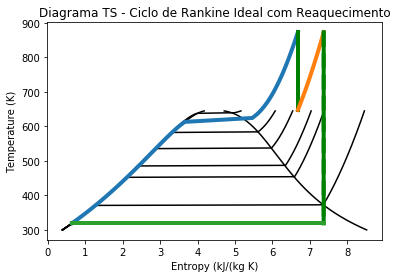

In [24]:
T_range =  np.linspace(300, 372+273, 200)
P_points = [0.1, 1, 2, 5, 10, 20]
cor_array = [cor1, cor2, cor2, cor3, cor4, cor4, cor5, cor6, cor6]

diagrama_TS_reheat (T_range, P_points, cor_array, plt.gca())

Também é necessário redefinir a classe para a análise do processo:

In [25]:
class analise_eta_rankine_reheat (object):
    
    def __init__ (self, T0, Th, cor_array, eta_bomba = 1.0, eta_turbina = 1.0):
        
        self.T_0 = T0
        self.T_h = Th
        self.eta_bomba = eta_bomba
        self.eta_turbina = eta_turbina
        
        self.cor1 = cor_array[0]
        self.cor2 = cor_array[1]
        self.cor3 = cor_array[2]
        self.cor4 = cor_array[3]
        self.cor5 = cor_array[4]
        self.cor6 = cor_array[5]
                
        self.q_h =  self.cor3.h - self.cor2.h + self.cor5.h - self.cor4.h
        self.q_c = self.cor6.h - self.cor1.h
        
    def calc_Eta1 (self):
                
        self.eta_1st_law = 1.0 - self.q_c/self.q_h
        
    def calc_Ex_loss (self):
        
        # refervedor, passe 1
        self.Ex_loss_2_3 = self.T_0*(self.cor3.s-self.cor2.s-(self.cor3.h - self.cor2.h)/self.T_h)

        # refervedor, passe 2
        self.Ex_loss_4_5 = self.T_0*(self.cor5.s-self.cor4.s-(self.cor5.h - self.cor4.h)/self.T_h)

        # condensador
        self.Ex_loss_6_1 = self.T_0*(self.cor1.s-self.cor6.s+self.q_c/self.T_0)
        
        # total
        self.Ex_loss_total = self.Ex_loss_2_3+self.Ex_loss_4_5+self.Ex_loss_6_1
        
        # frações
        self.frac_Ex_loss_2_3 = self.Ex_loss_2_3/self.Ex_loss_total
        self.frac_Ex_loss_4_5 = self.Ex_loss_4_5/self.Ex_loss_total
        self.frac_Ex_loss_6_1 = self.Ex_loss_6_1/self.Ex_loss_total
        
    def calc_Ex_gasto (self):
        
        # bomba (=trabalho da bomba!)
        self.Ex_gasto_1_2 = self.cor1.v*(self.cor2.P-self.cor1.P)*1e3

        # refervedor, passe 1 (= eficiencia de carnot!)
        self.Ex_gasto_2_3 = (1.-self.T_0/self.T_h)*(self.cor3.h - self.cor2.h)

        # refervedor, passe 2 (= eficiencia de carnot!)
        self.Ex_gasto_4_5 = (1.-self.T_0/self.T_h)*(self.cor5.h - self.cor4.h)
        
        # total
        self.Ex_gasto_total = self.Ex_gasto_1_2 + self.Ex_gasto_2_3 + self.Ex_gasto_4_5
        
    def calc_Eta2 (self):
        
        self.eta_2nd_law = 1.0 - self.Ex_loss_total/self.Ex_gasto_total
        
    def calc_all (self):
        
        self.calc_Eta1()
        self.calc_Ex_loss()
        self.calc_Ex_gasto()
        self.calc_Eta2()
        
    def print_results (self):
        
        print('Calor do refervedor: ',self.q_h,'kJ/kg')
        print('Calor do condensador: ', self.q_c,'kJ/kg')
        print('------------------------------------------------')
        print('Eficiência de primeiro tipo: ',self.eta_1st_law)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Perda de exergia, aquecimento 1:',self.Ex_loss_2_3,'kJ/kg')
        print('Perda de exergia, aquecimento 2:', self.Ex_loss_4_5,'kJ/kg')
        print('Perda de exergia, resfriamento:', self.Ex_loss_6_1,'kJ/kg')
        print('------------------------------------------------')
        print('% da perda de exergia, aquecimento 1: ',self.Ex_loss_2_3/(self.Ex_loss_2_3+self.Ex_loss_4_5+self.Ex_loss_6_1))
        print('% da perda de exergia, aquecimento 2: ',self.Ex_loss_4_5/(self.Ex_loss_2_3+self.Ex_loss_4_5+self.Ex_loss_6_1))
        print('% da perda de exergia, resfriamento: ',self.Ex_loss_6_1/(self.Ex_loss_2_3+self.Ex_loss_4_5+self.Ex_loss_6_1))
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Gasto de exergia na bomba:',self.Ex_gasto_1_2,'kJ/kg')
        print('Gasto de exergia no aquecimento 1:',self.Ex_gasto_2_3,'kJ/kg')
        print('Gasto de exergia no aquecimento 2:',self.Ex_gasto_4_5,'kJ/kg')

        print('------------------------------------------------')
        print('% do gasto de exergia na bomba: ',self.Ex_gasto_1_2/(self.Ex_gasto_1_2+self.Ex_gasto_2_3+self.Ex_gasto_4_5))
        print('% do gasto, etapa aquecimento 1: ',self.Ex_gasto_2_3/(self.Ex_gasto_1_2+self.Ex_gasto_2_3+self.Ex_gasto_4_5))
        print('% do gasto, etapa aquecimento 2: ',self.Ex_gasto_4_5/(self.Ex_gasto_1_2+self.Ex_gasto_2_3+self.Ex_gasto_4_5))
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Eficiência do segundo tipo:',self.eta_2nd_law)

Efetuando os cálculos:

In [26]:
# temperatura ambiente
T_0 = 300

# temperatura da fonte quente
T_h = 800

analise5 = analise_eta_rankine_reheat (T_0, T_h, [cor1, cor2, cor3, cor4, cor5, cor6])
analise5.calc_all()
print('------------------------------------------------')
print('Ciclo de Rankine ideal com reaquecimento - Análise energética e exergética')
print('P1 = 10 kPa, P3 = 15 MPa, T3 = 600 K, T0 = 300 K e Tq = 800 K')
print('------------------------------------------------')
analise5.print_results()

------------------------------------------------
Ciclo de Rankine ideal com reaquecimento - Análise energética e exergética
P1 = 10 kPa, P3 = 15 MPa, T3 = 600 K, T0 = 300 K e Tq = 800 K
------------------------------------------------
Calor do refervedor:  3897.27147179 kJ/kg
Calor do condensador:  2143.2988792139754 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.450051428358
------------------------------------------------
------------------------------------------------
Perda de exergia, aquecimento 1: 543.0047317988596 kJ/kg
Perda de exergia, aquecimento 2: 11.8850128867 kJ/kg
Perda de exergia, resfriamento: 127.38618563658744 kJ/kg
------------------------------------------------
% da perda de exergia, aquecimento 1:  0.79587261937
% da perda de exergia, aquecimento 2:  0.0174196572948
% da perda de exergia, resfriamento:  0.186707723335
------------------------------------------------
------------------------------------------------
Gasto de

A título de ilustração, podemos visualizar os resultados para o cálculo realizado na análise anterior, com os mesmos limites de pressão e temperatura, mas sem o reaquecimento:

In [27]:
analise4[-1].print_results()

Calor do refervedor:  3376.39913129 kJ/kg
Calor do condensador:  1923.47546753 kJ/kg
Trabalho da bomba:  15.1438059848 kJ/kg
Trabalho da turbina:  1468.01984333 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.432847193881
------------------------------------------------
------------------------------------------------
Perda de exergia do refervedor:  543.004731799 kJ/kg
Perda de exergia do condensador: 114.321061496 kJ/kg
Perda de exergia da bomba:  0.0 kJ/kg
Perda de exergia da turbina:  0.0 kJ/kg
------------------------------------------------
% da perda de exergia no refervedor:  0.82608158289
% da perda de exergia no condensador:  0.17391841711
% da perda de exergia na bomba:  0.0
% da perda de exergia na turbina:  0.0
------------------------------------------------
------------------------------------------------
Gasto de exergia da bomba:  15.1438059848 kJ/kg
Gasto de exergia do refervedor: 2110.24945706 kJ/kg
-----------------------------

Percebe-se que ambas as eficiências aumentam ligeiramente com o reaquecimento. Mas a grande vantagem dessa técnica reside no aumento da qualidade do vapor:

In [28]:
print('Qualidade do vapor, caso sem reaquecimento: ', analise4[-1].cor4.x)
print('Qualidade do vapor, caso com reaquecimento: ', analise5.cor4.x)

Qualidade do vapor, caso sem reaquecimento:  0.804103448016
Qualidade do vapor, caso com reaquecimento:  1


Nesse caso, o reaquecimento, além de aumentar ligeiramente as eficiências, elimina completamente o problema de umidade na turbina!

### 3.3 Ciclo Rankine Não-Ideal

As análise feitas até agora para um processo sem irreversibilidades internas. Vejamos o que acontece quando o processo possui tais irreversibilidades.

O caso a ser estudado apresenta as seguintes especificações:

* $P_1 = 75$ kPa;
* $P_3 = 3$ MPa e $T_3 = 350^{\circ}$C;
* $ T_0 = 300$, $T_f = 300$ K e $T_q = 800 $ K (temperaturas ambiente, da fonte fria e da fonte quente).
* eficiência isentrópica da turbina e da bomba: 0,85 e 0,7.

Definindo as correntes:

In [29]:
x = sympy.Symbol('x')
eta_bomba = 0.7
eta_turbina = 0.85

# corrente 1
P1 = 75e-3
x1 = 0.
cor1 = IAPWS97(P=P1, x = x1)
print_properties(cor1,1)

# corrente 2 (ideal)
P2 = 3.
s2_ideal = cor1.s
cor2_ideal = IAPWS97(P=P2, s = s2_ideal)
print_properties(cor2_ideal,'2, ideal')

# corrente 2 (real)
h2 = sympy.solvers.solve(eta_bomba - (cor2_ideal.h-cor1.h)/(x-cor1.h),x)[0]
h2 = float(h2)
cor2 = IAPWS97(P=P2, h = h2)
print_properties(cor2,2)

# corrente 3
P3 = 3.
T3 = 400+273.15
cor3 = IAPWS97(P=P3, T = T3)
print_properties(cor3,3)

# corrente 4 (ideal)
P4 = 75e-3
s4_ideal = cor3.s
cor4_ideal = IAPWS97(P=P4, s = s4_ideal)
print_properties(cor4_ideal,'4, ideal')

# corrente 4 (real)
h4 = sympy.solvers.solve(eta_turbina - (cor3.h-x)/(cor3.h-cor4_ideal.h),x)[0]
h4 = float(h4)
cor4 = IAPWS97(P=P4, h = h4)
print_properties(cor4,4)

----------
CORRENTE 1
----------
T: 364.90779128713774 K
P: 0.075 MPa
v: 0.0010372190358311562 m^3/kg
h: 384.36547579253715 kJ/kg
s: 1.2129634483689353 kJ/kg K
----------
CORRENTE 2, ideal
----------
T: 365.0933635759776 K
P: 3.0 MPa
v: 0.0010359183018938609 m^3/kg
h: 387.3974360614888 kJ/kg
s: 1.2129634483689329 kJ/kg K
----------
CORRENTE 2
----------
T: 365.40268645705163 K
P: 3.0 MPa
v: 0.0010361439349918411 m^3/kg
h: 388.6968476053255 kJ/kg
s: 1.2165210627164285 kJ/kg K
----------
CORRENTE 3
----------
T: 673.15 K
P: 3.0 MPa
v: 0.0993766406262247 m^3/kg
h: 3231.5710272596534 kJ/kg
s: 6.923259254971664 kJ/kg K
----------
CORRENTE 4, ideal
----------
T: 364.90779128713774 K
P: 0.075 MPa
v: 2.028087266023023 m^3/kg
h: 2468.107334813577 kJ/kg
s: 6.923259254971664 kJ/kg K
----------
CORRENTE 4
----------
T: 364.90779128713774 K
P: 0.075 MPa
v: 2.1394911167648565 m^3/kg
h: 2582.6268886804955 kJ/kg
s: 7.2370891688783265 kJ/kg K


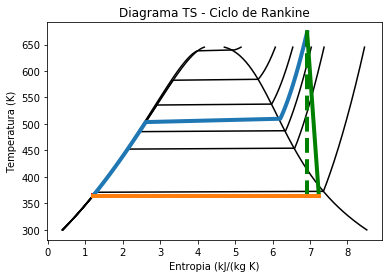

In [30]:
T_range =  np.linspace(300, 372+273, 200)
P_points = [0.1, 1, 2, 5, 10, 20]
cor_array = [cor1, cor2_ideal, cor2, cor3, cor4_ideal, cor4]

diagrama_TS_rankine (T_range, P_points, cor_array, plt.gca())

In [31]:
print('Ciclo de Rankine - Análise do caso real')
print('------------------------------------------------')
analise6 = analise_eta_rankine(T_0, T_h, [cor1, cor2, cor3, cor4], eta_bomba = 1, eta_turb = 0.85)
analise6.calc_all()
analise6.print_results()

Ciclo de Rankine - Análise do caso real
------------------------------------------------
Calor do refervedor:  2842.874179654328 kJ/kg
Calor do condensador:  2198.2614128879586 kJ/kg
Trabalho da bomba:  3.033865679806132 kJ/kg
Trabalho da turbina:  648.9441385791579 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.22802709301978386
------------------------------------------------
------------------------------------------------
Perda de exergia do refervedor:  645.9436403061976 kJ/kg
Perda de exergia do condensador: 391.0236967351412 kJ/kg
Perda de exergia da bomba:  0.0 kJ/kg
Perda de exergia da turbina:  114.51955386691024 kJ/kg
------------------------------------------------
% da perda de exergia no refervedor:  0.5609648233135349
% da perda de exergia no condensador:  0.3395815443688782
% da perda de exergia na bomba:  0.0
% da perda de exergia na turbina:  0.09945363231758685
------------------------------------------------
------------------

In [32]:
print('Ciclo de Rankine - Análise do caso ideal')
print('------------------------------------------------')
      
analise7 = analise_eta_rankine(T_0, T_h, [cor1, cor2_ideal, cor3, cor4_ideal],eta_bomba = 1, eta_turb = 1)
analise7.calc_all()
analise7.print_results()

Ciclo de Rankine - Análise do caso ideal
------------------------------------------------
Calor do refervedor:  2844.1735911981646 kJ/kg
Calor do condensador:  2083.74185902104 kJ/kg
Trabalho da bomba:  3.033865679806132 kJ/kg
Trabalho da turbina:  763.4636924460765 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.26814473620521917
------------------------------------------------
------------------------------------------------
Perda de exergia do refervedor:  646.5236452815078 kJ/kg
Perda de exergia do condensador: 370.6531170402214 kJ/kg
Perda de exergia da bomba:  0.0 kJ/kg
Perda de exergia da turbina:  0.0 kJ/kg
------------------------------------------------
% da perda de exergia no refervedor:  0.6356059922228294
% da perda de exergia no condensador:  0.36439400777717057
% da perda de exergia na bomba:  0.0
% da perda de exergia na turbina:  0.0
------------------------------------------------
------------------------------------------------

Percebe-se que a irreversibilidade na turbina diminui sobremaneira a eficiência exergética do processo, apesar dos grandes causadores de ineficiência no processo continuarem sendo os trocadores de calor.

A análise acima sugere uma análise da sensibilidade das eficiências em relação à eficiência isentrópica na turbina:

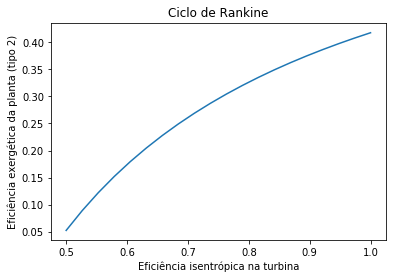

In [33]:
eta_range = np.linspace(0.5,1,20)

analise8 = []
for eta in eta_range:
    analise8.append(analise_eta_rankine(T_0, T_h, [cor1, cor2, cor3, cor4], eta_bomba = 1, eta_turb = eta))
    analise8[-1].calc_all()

plt.plot(eta_range,[analise8[i].eta_2nd_law for i in range(len(eta_range))], label='Tipo 2')
plt.title('Ciclo de Rankine')
plt.xlabel('Eficiência isentrópica na turbina')
plt.ylabel('Eficiência exergética da planta (tipo 2)');

É interessante notar que, para baixas eficiências isentrópicas na turbina, a eficiência exergética quase se anula.

## 3.4 Ciclo de Rankine com cogeração

Na cogeração, o calor a ser descartado na fonte fria é usado para esquentar uma corrente de processo. É de se esperar, portanto, que a eficiência de primeiro tipo aumente bastante, já que o desperdício quantitativo de energia diminui consideravelmente. Do ponto de vista da segunda lei, entretanto, não é tão óbvio o que deve acontecer com a eficiência de segundo tipo. Nessa seção, irá se analisar o que ocorre em uma planta desse tipo, do ponto de vista energético e exergético.

O exemplo aqui analisado é ilustrado abaixo:

<a href="https://ibb.co/kf5OLR"><img src="https://preview.ibb.co/m5yzum/cogeracao.png" alt="cogeracao" border="0"></a>

Especificando as correntes:

In [34]:
P1 = 7
T1 = 500 + 273.15
cor1 = IAPWS97(P=P1, T = T1)
print_properties(cor1,1)

cor2 = cor1
print_properties(cor2,2)

cor3 = cor1
print_properties(cor3,3)

P4 = 5e-1
h4 = cor2.h
cor4 = IAPWS97(P=P4, h = h4)
print_properties(cor4,3)

P5 = 5e-1
s5 = cor3.s
cor5 = IAPWS97(P=P5, s = s5)
print_properties(cor5,5)

P6 = 5e-3
s6 = cor3.s
cor6 = IAPWS97(P=P6, s = s6)
print_properties(cor6,6)

P7 = cor4.P
x7 = 0.0
cor7 = IAPWS97(P=P7, x = x7)
print_properties(cor7,7)

P8 = P6
x8 = 0.0
cor8 = IAPWS97(P=P8, x = x8)
print_properties(cor8,8)

P9 = 7.0
h9 = cor8.h+cor8.v*(P9-P8)*1e3
cor9 = IAPWS97(P=P9, h = h9)
print_properties(cor9,9)

P10 = P9
h10 = cor7.h + cor7.v*(P10-P7)*1e3
cor10 = IAPWS97(P=P10, h = h10)
print_properties(cor10,10)

----------
CORRENTE 1
----------
T: 773.15 K
P: 7 MPa
v: 0.04815850019755666 m^3/kg
h: 3411.250263821653 kJ/kg
s: 6.799715110693559 kJ/kg K
----------
CORRENTE 2
----------
T: 773.15 K
P: 7 MPa
v: 0.04815850019755666 m^3/kg
h: 3411.250263821653 kJ/kg
s: 6.799715110693559 kJ/kg K
----------
CORRENTE 3
----------
T: 773.15 K
P: 7 MPa
v: 0.04815850019755666 m^3/kg
h: 3411.250263821653 kJ/kg
s: 6.799715110693559 kJ/kg K
----------
CORRENTE 3
----------
T: 738.95281232666 K
P: 0.5 MPa
v: 0.67899375165085 m^3/kg
h: 3411.250263821653 kJ/kg
s: 7.992328817910098 kJ/kg K
----------
CORRENTE 5
----------
T: 424.9862438768451 K
P: 0.5 MPa
v: 0.37323230867051616 m^3/kg
h: 2739.2399972965886 kJ/kg
s: 6.799715110693558 kJ/kg K
----------
CORRENTE 6
----------
T: 306.02548952376014 K
P: 0.005 MPa
v: 22.511271591734467 m^3/kg
h: 2072.900648873556 kJ/kg
s: 6.799715110693559 kJ/kg K
----------
CORRENTE 7
----------
T: 424.9862438768451 K
P: 0.5 MPa
v: 0.001092556654309798 m^3/kg
h: 640.1853353633861 kJ/k

Resta apenas saber a condição da corrente 11. Essa corrente é especificada por meio de um balanço de massa, quando se determina a fração de corrente que é desviada para o aquecedor de processo. Como esse foi parâmetro da análise de sensibilidade aqui realizada, a definição dessa corrente foi feita na classe responsável pela efetuação dos cálculos:

In [35]:
class analise_eta_rankine_cogeneration (object):
    
    def __init__ (self, T0, Th, cor_array, y_valv, y_turb, eta_bomba = [1.0, 1.0], eta_turbina = 1.0):
        
        self.T_0 = T0
        self.T_h = Th
        self.eta_bomba = eta_bomba
        self.eta_turbina = eta_turbina
        
        self.y_valv = y_valv
        self.y_turb = y_turb
        
        self.cor1 = cor_array[0]
        self.cor2 = cor_array[1]
        self.cor3 = cor_array[2]
        self.cor4 = cor_array[3]
        self.cor5 = cor_array[4]
        self.cor6 = cor_array[5]
        self.cor7 = cor_array[6]
        self.cor8 = cor_array[7]
        self.cor9 = cor_array[8]
        self.cor10 = cor_array[9]
        
        h11 = (self.y_valv+self.y_turb) * cor10.h + (1.-self.y_valv-self.y_turb) * cor9.h
        self.cor11 = IAPWS97(P=self.cor10.P, h = h11)

        # calores do refervedor, do condensador e de processo
        self.q_h = self.cor1.h - self.cor11.h
        self.q_c = (1.-self.y_valv-self.y_turb)*(self.cor6.h - self.cor8.h)
        self.q_p = self.y_valv*self.cor4.h + self.y_turb*self.cor5.h - (self.y_valv+self.y_turb)*self.cor7.h
        
        # trabalho da bomba I
        self.w_bombaI = (1.-self.y_valv-self.y_turb)*self.cor8.v*(self.cor9.P-self.cor8.P)*1e3
        
        # trabalho da bomba II
        self.w_bombaII = (self.y_valv+self.y_turb)*self.cor7.v*(self.cor10.P-self.cor7.P)*1e3
        
        # trabalho da turbina
        self.w_turb = (1.-self.y_valv)*((1-self.y_valv-self.y_turb)*(self.cor3.h-self.cor6.h)+(y_turb)*(self.cor3.h-self.cor5.h))
                
    def calc_Eta1 (self):
                
        self.eta_1st_law = (self.q_p+self.w_turb)/(self.w_bombaI+self.w_bombaII+self.q_h)
        
    def calc_Ex_loss (self):
        
        # refervedor
        self.Ex_loss_11_1 = self.T_0*(self.cor1.s-self.cor11.s-(self.cor1.h - self.cor11.h)/self.T_h)
                
        # condensador
        self.Ex_loss_6_8 = self.T_0*((1.-self.y_valv-self.y_turb)*(self.cor8.s-self.cor6.s)+self.q_c/self.T_0)
        
        # válvulva
        self.Ex_loss_2_4 = self.y_valv*self.T_0*(self.cor4.s-self.cor2.s)
        
        # aquecedor de processo
        self.Ex_loss_4_5_7 = self.T_0*((self.y_valv+self.y_turb)*self.cor7.s-self.y_valv*self.cor4.s-self.y_turb*self.cor5.s+self.q_p/self.T_0)
        
        # misturador
        self.Ex_loss_9_10_11 = self.T_0*(self.cor11.s-(self.y_turb+self.y_valv)*self.cor10.s-(1.-self.y_turb-self.y_valv)*self.cor9.s)
        
        # total
        self.Ex_loss_total = self.Ex_loss_11_1+self.Ex_loss_6_8+self.Ex_loss_2_4+self.Ex_loss_4_5_7+self.Ex_loss_9_10_11
        
        # frações
        self.frac_Ex_loss_11_1 = self.Ex_loss_11_1/self.Ex_loss_total
        self.frac_Ex_loss_6_8 = self.Ex_loss_6_8/self.Ex_loss_total
        self.frac_Ex_loss_2_4 = self.Ex_loss_2_4/self.Ex_loss_total
        self.frac_Ex_loss_4_5_7 = self.Ex_loss_4_5_7/self.Ex_loss_total
        self.frac_Ex_loss_9_10_11 = self.Ex_loss_9_10_11/self.Ex_loss_total
        
    def calc_Ex_gasto (self):
        
        # bomba 1 (=trabalho da bomba!)
        self.Ex_gasto_8_9 = self.w_bombaI
    
        # bomba 2 (=trabalho da bomba!)
        self.Ex_gasto_7_10 = self.w_bombaII

        # refervedor (= eficiencia de carnot!)
        self.Ex_gasto_11_1 = (1.-self.T_0/self.T_h)*(self.cor1.h - self.cor11.h)
        
        # total
        self.Ex_gasto_total = self.Ex_gasto_8_9 + self.Ex_gasto_7_10 + self.Ex_gasto_11_1
        
        # frações
        self.frac_Ex_gasto_8_9 = self.Ex_gasto_8_9/self.Ex_gasto_total
        self.frac_Ex_gasto_7_10 = self.Ex_gasto_7_10/self.Ex_gasto_total
        self.frac_Ex_gasto_11_1 = self.Ex_gasto_11_1/self.Ex_gasto_total
        
    def calc_Eta2 (self):
        
        self.eta_2nd_law = 1.0 - self.Ex_loss_total/self.Ex_gasto_total
        
    def calc_all (self):
        
        self.calc_Eta1()
        self.calc_Ex_loss()
        self.calc_Ex_gasto()
        self.calc_Eta2()
        
    def print_results (self):
        
        print('Calor do refervedor: ',self.q_h,'kJ/kg')
        print('Calor do condensador: ', self.q_c,'kJ/kg')
        print('Calor de processo: ', self.q_p,'kJ/kg')
        print('Trabalho da bomba I: ',self.w_bombaI,'kJ/kg')
        print('Trabalho da bomba II: ', self.w_bombaII,'kJ/kg')
        print('Trabalho da turbina: ', self.w_turb,'kJ/kg')
        print('------------------------------------------------')
        print('Eficiência de primeiro tipo: ',self.eta_1st_law)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Perda de exergia, refervedor:',self.Ex_loss_11_1,'kJ/kg')
        print('Perda de exergia, condensador:', self.Ex_loss_6_8,'kJ/kg')
        print('Perda de exergia, válvula:', self.Ex_loss_2_4,'kJ/kg')
        print('Perda de exergia, aquecedor de processo:', self.Ex_loss_4_5_7,'kJ/kg')
        print('Perda de exergia, misturador: ',self.Ex_loss_9_10_11,'kJ/kg')
        print('------------------------------------------------')
        print('% da perda de exergia, refervedor: ',self.frac_Ex_loss_11_1)
        print('% da perda de exergia, condensador: ',self.frac_Ex_loss_6_8)
        print('% da perda de exergia, válvula: ',self.frac_Ex_loss_2_4)
        print('% da perda de exergia, aquecedor de processo: ',self.frac_Ex_loss_4_5_7)
        print('% da perda de exergia, misturador: ',self.frac_Ex_loss_9_10_11)
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Gasto de exergia na bomba 1:',self.Ex_gasto_8_9,'kJ/kg')
        print('Gasto de exergia na bomba 2:',self.Ex_gasto_7_10,'kJ/kg')
        print('Gasto de exergia no refervedor:',self.Ex_gasto_11_1,'kJ/kg')
        print('------------------------------------------------')
        print('% do gasto de exergia, bomba 1:',self.frac_Ex_gasto_8_9,'kJ/kg')
        print('% do gasto de exergia, bomba 2:',self.frac_Ex_gasto_7_10,'kJ/kg')
        print('% do gasto de exergia, refervedor:',self.frac_Ex_gasto_11_1,'kJ/kg')
        
        print('------------------------------------------------')
        print('------------------------------------------------')
        
        print('Eficiência do segundo tipo:',self.eta_2nd_law)

In [36]:
analise9 = analise_eta_rankine_cogeneration (T_0, T_h, [cor1, cor2, cor3, cor4, cor5, cor6, cor7, cor8, cor9, cor10],0.1,0.6,1,1)
analise9.calc_all()
analise9.print_results()

Calor do refervedor:  2914.7101940497873 kJ/kg
Calor do condensador:  580.5406589655197 kJ/kg
Calor de processo:  1536.5392900057482 kJ/kg
Trabalho da bomba I:  2.1096665438380016 kJ/kg
Trabalho da bomba II:  4.97113277710958 kJ/kg
Trabalho da turbina:  724.2399399595209 kJ/kg
------------------------------------------------
Eficiência de primeiro tipo:  0.77376487062037
------------------------------------------------
------------------------------------------------
Perda de exergia, refervedor: 499.6082917376991 kJ/kg
Perda de exergia, condensador: 11.429140058558485 kJ/kg
Perda de exergia, válvula: 35.77841121649618 kJ/kg
Perda de exergia, aquecedor de processo: 463.54655414551 kJ/kg
Perda de exergia, misturador:  13.692329827853959 kJ/kg
------------------------------------------------
% da perda de exergia, refervedor:  0.4878726483769963
% da perda de exergia, condensador:  0.01116067311382414
% da perda de exergia, válvula:  0.034937987466544064
% da perda de exergia, aquecedor 

É notável a alta eficiência energética desse processo, já que o desperdício de calor do condensador diminui substancialmente! No entanto, a eficiência exergética não é tão alta.

Nas análises abaixo, verifica-se como as eficiências energética e exergética variam com os desvios de corrente para o aquecedor de processo:

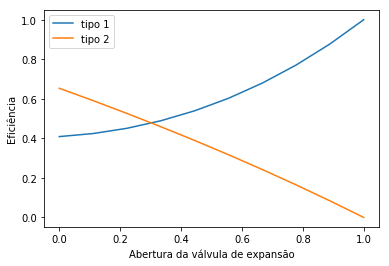

In [37]:
y_turb_range = np.linspace(0,1,10)

analise10 = []

for y in y_turb_range:
    analise10.append(analise_eta_rankine_cogeneration(T_0, T_h, [cor1, cor2, cor3, cor4, cor5, cor6, cor7, cor8, cor9, cor10],y,0,1,1))
    analise10[-1].calc_all()
      
plt.plot(y_turb_range, [analise10[i].eta_1st_law for i in range(len(y_turb_range))],label='tipo 1')
plt.plot(y_turb_range, [analise10[i].eta_2nd_law for i in range(len(y_turb_range))],label='tipo 2')
plt.xlabel('Abertura da válvula de expansão')
plt.ylabel('Eficiência')
plt.legend();

Quanto maior a abertura da válvula de expansão, maior a eficiência energética e menor a eficiência exergética, até o ponto em que o processo é 100% eficiente do ponto de vista energético (a energia toda se conserva), mas 0 % ineficiente do ponto de vista exergético (a exergia toda é destruída, pois não se realiza trabalho).

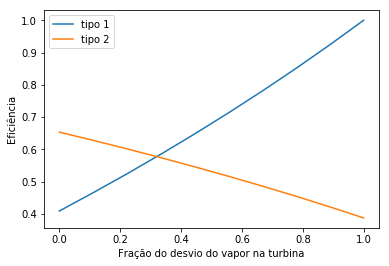

In [38]:
y_turb_range = np.linspace(0,1,10)

analise9 = []

for y in y_turb_range:
    analise9.append(analise_eta_rankine_cogeneration(T_0, T_h, [cor1, cor2, cor3, cor4, cor5, cor6, cor7, cor8, cor9, cor10],0,y,1,1))
    analise9[-1].calc_all()
    
    
plt.plot(y_turb_range, [analise9[i].eta_1st_law for i in range(len(y_turb_range))],label='tipo 1')
plt.plot(y_turb_range, [analise9[i].eta_2nd_law for i in range(len(y_turb_range))],label='tipo 2')
plt.xlabel('Fração do desvio do vapor na turbina')
plt.ylabel('Eficiência')
plt.legend();

Esse gráfico confirma a tendência anterior, mas de forma mais branda, já que o desvio de 100% vapor na turbina ainda possibilita a geração de uma quantidade de trabalho.

Conclui-se que a cogeração aumenta a eficiência energética de um processo, diminuindo concomitantemente sua eficiência exergética. Via de regra, é recomendável que se use a cogeração quando há necessidade de calor de processo e sua produção independente resultaria em mais irreversibilidades ao total do que a produção acoplada à planta de vapor.

## Conclusão

Neste notebook, foi apresentado o conceito de exergia e sua aplicação na análise de ciclos de potência a vapor. Contabilizar as meras quantidades de energia que entram e saem de um processo muitas vezes não é a melhor forma de verificar sua eficiência, e a contabilização da exergia se mostra mais útil que da energia nesse sentido, já que ela introduz uma forma natural de medir o desempenho dos processos tendo como referência a segunda lei da termodinâmica. Exemplos práticos e simples de programar foram apresentados, e espera-se que o(a) leitor(a) ao fim do texto esteja familiarizado com métodos para análise termodinâmica de processos em linguagem Python.

## Referências

[Thermodynamics: An Engineering Approach - Yunus Çengel e Michael A. Boles - 8a Ed, Mc-Graw Hill, 2015](https://www.amazon.com/Thermodynamics-Engineering-Yunus-Cengel-Dr/dp/0073398179)

[Nonequilibrium Thermodynamics - Transport and Rate Processes in Physical, Chemical and Biological Systems - Yasar Demirel - 3a Ed, Elsevier, 2014](https://www.elsevier.com/books/nonequilibrium-thermodynamics/demirel/978-0-444-59557-7)

[Animal Farm - George Orwell - Standard Ed, Signet, 2004](https://en.wikipedia.org/wiki/Animal_Farm)

[Basic Structures of Reality: Essays in Meta-Physics- Colin McGinn (Ed.) - Oxford Scholarship, 2012](http://www.oxfordscholarship.com/view/10.1093/acprof:oso/9780199841103.001.0001/acprof-9780199841103)

[Applied Chemical and Engineering Thermodynamics - Dimitrius Tassios - Springer, 1993](http://www.springer.com/br/book/9783662016473)

[Availabily (Exergy Analysis): A Self-Instruction Manual - Martin V. Sussman - 3a Ed, Mulliken House, 1985](https://www.amazon.com/Availability-Exergy-Analysis-Instruction-Manual/dp/B0006YV9FA)

